Overfitting is a common issue in Machine Learning. L1 and L2 are some of the techniques to overcome this overfitting.

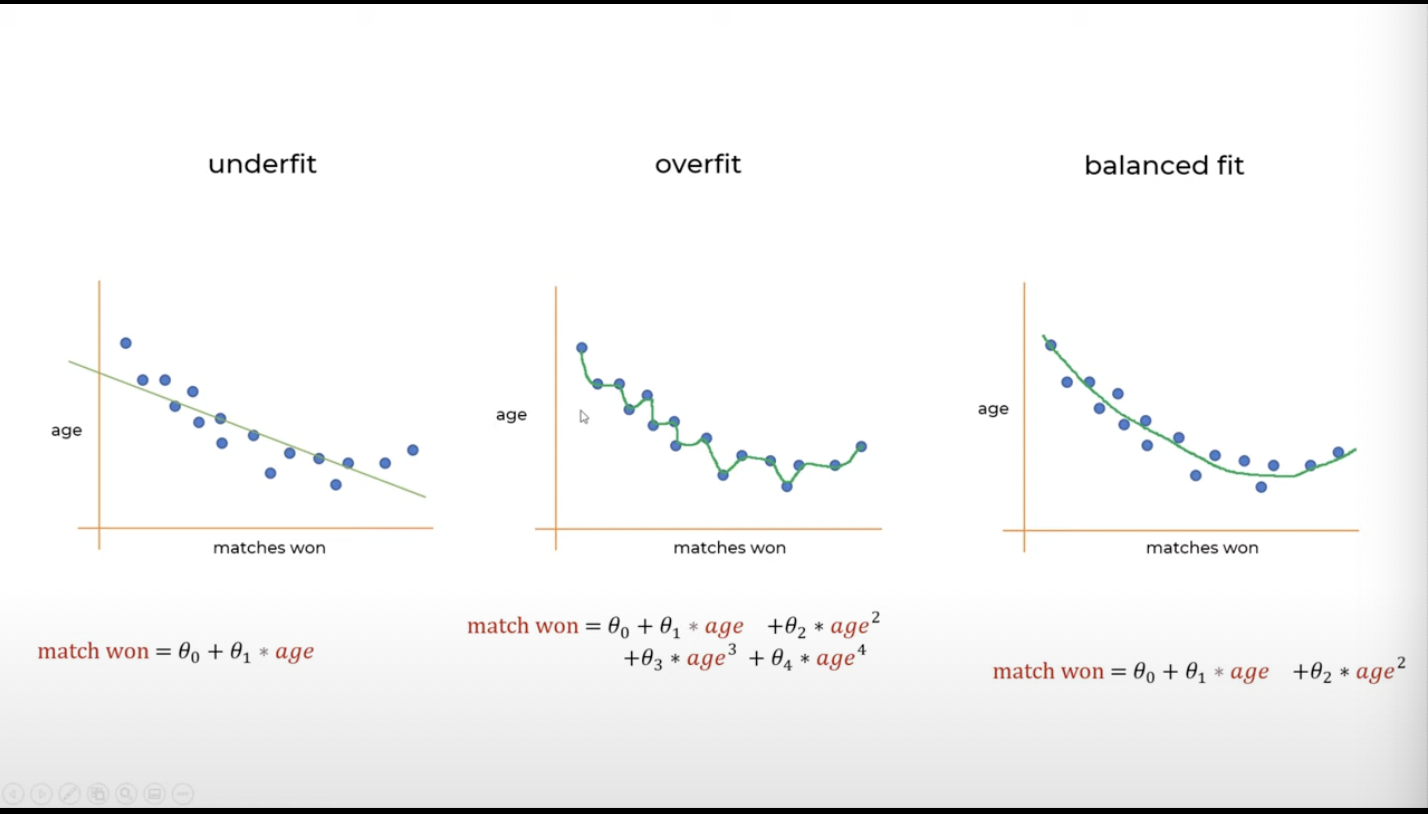

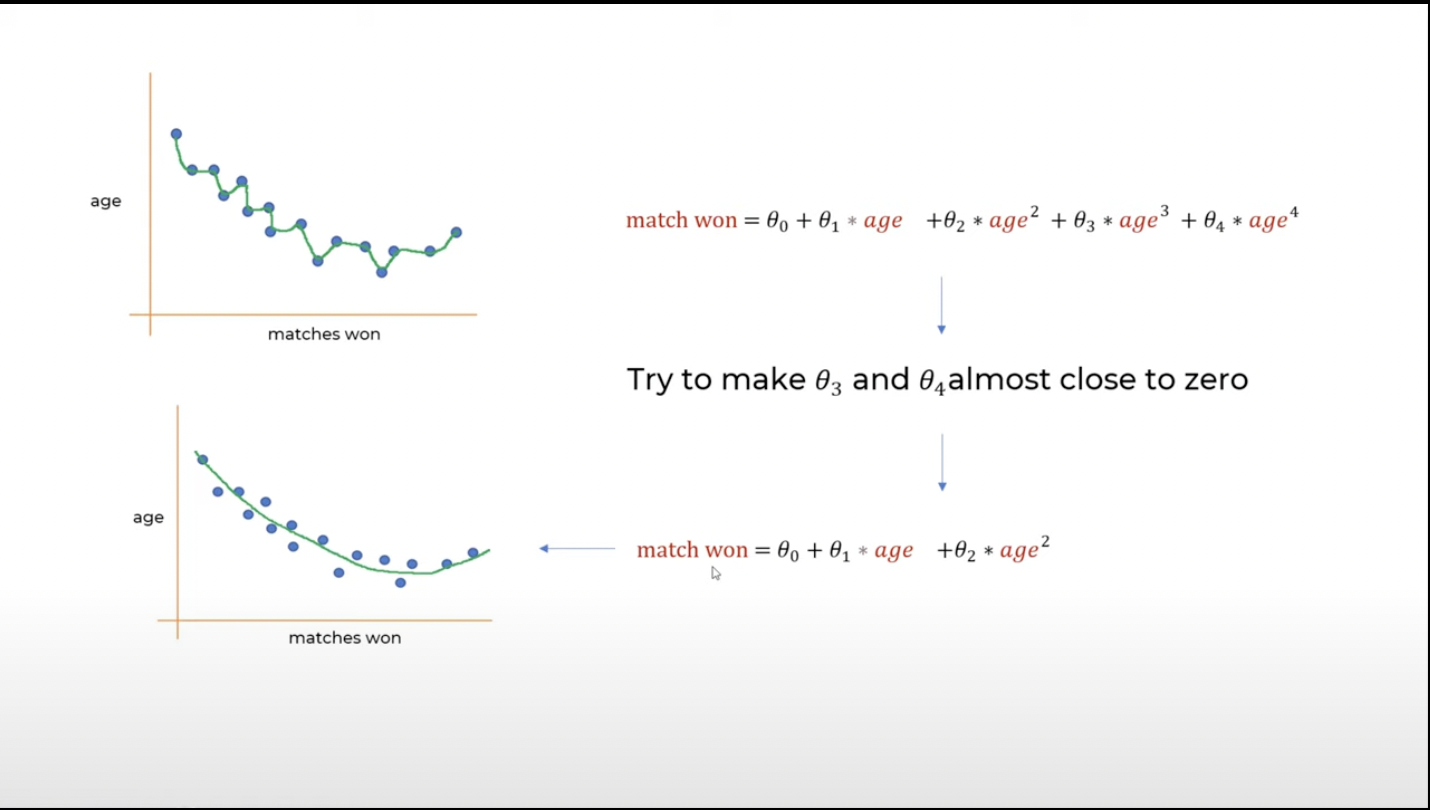

### Mean Square Error

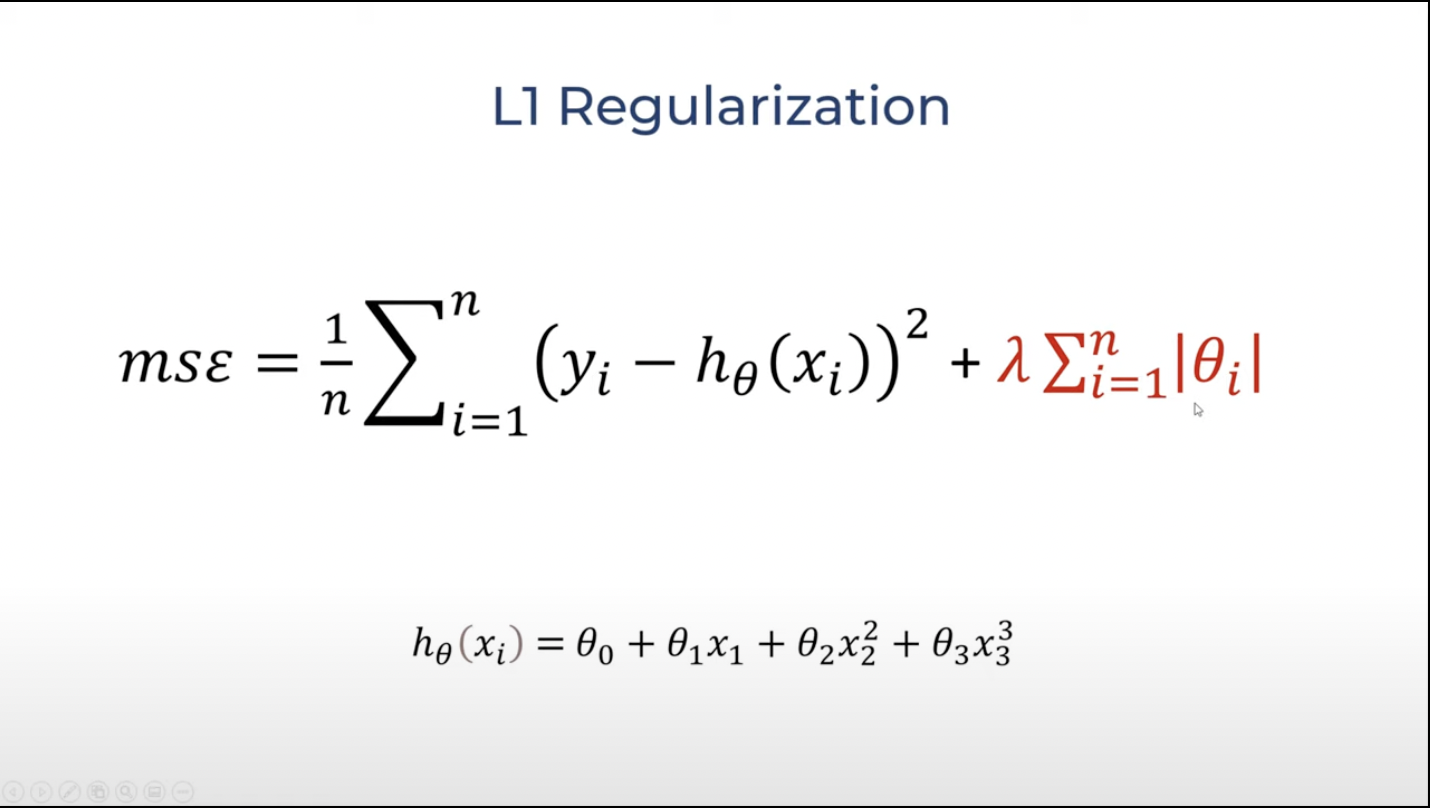

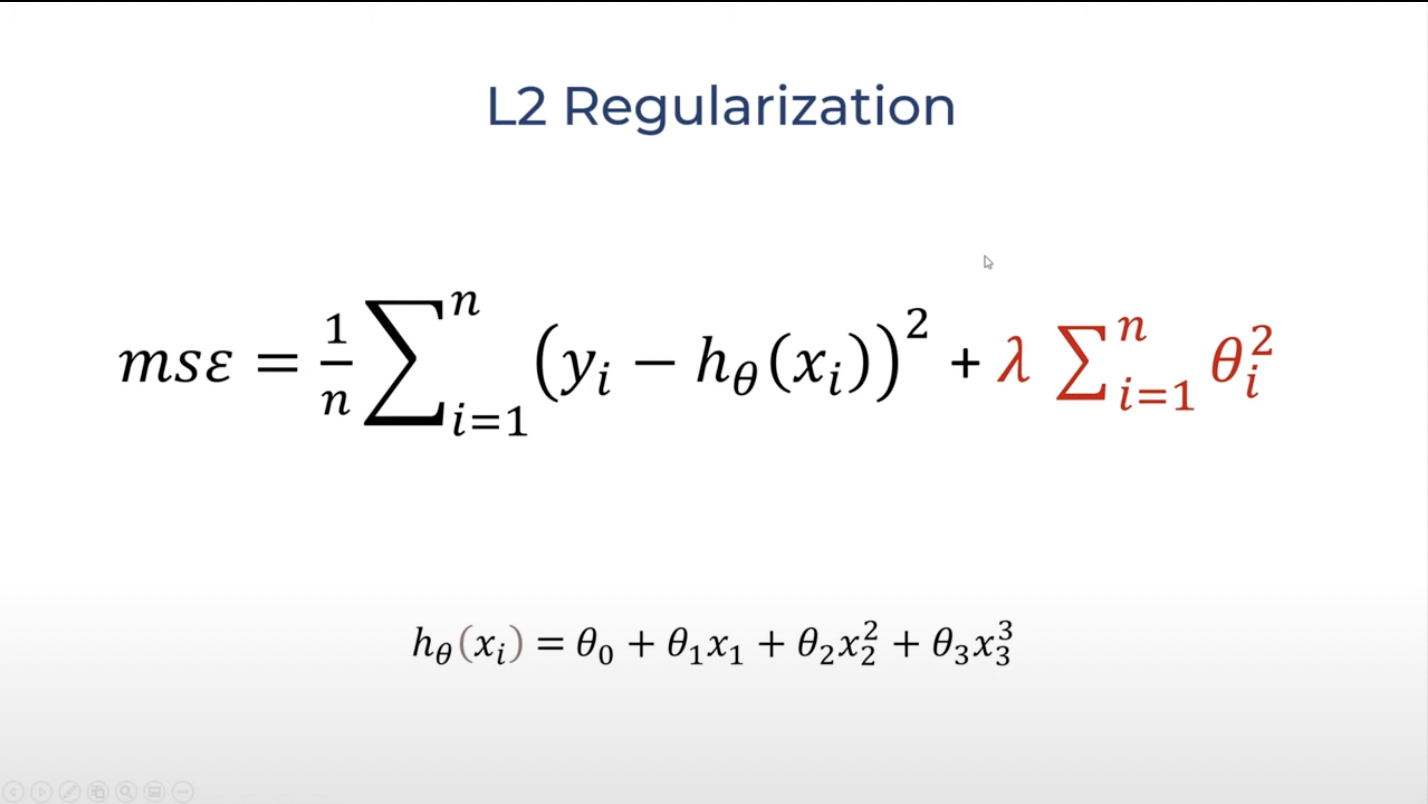

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/16_regularization/Melbourne_housing_FULL.csv")

In [7]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
dataset.shape

(34857, 21)

In [11]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [13]:
cols_to_use = ['Suburb', 'Rooms',  'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

dataset = dataset[cols_to_use]

dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [14]:
dataset.nunique()

Suburb            351
Rooms              12
Type                3
Method              9
SellerG           388
Regionname          8
Propertycount     342
Distance          215
CouncilArea        33
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
Price            2871
dtype: int64

In [15]:
dataset.shape

(34857, 15)

In [16]:
dataset.isnull().any()

Suburb           False
Rooms            False
Type             False
Method           False
SellerG          False
Regionname        True
Propertycount     True
Distance          True
CouncilArea       True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
Price             True
dtype: bool

In [17]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [18]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [19]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64